##### Importing needed Packages 

In [342]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading Transactions sheet and explore it  

In [343]:
transactions_df = pd.read_csv(r'E:\MegaMarket_Project\megaMarket\changes\Maven CSV - NPz files\project_transactions.csv', 
                              delimiter=',')


transactions_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [344]:
'''Checking missing data'''
transactions_df.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [345]:
'''Modify datatypes for all columns'''
transactions_df.dtypes

household_key          int64
BASKET_ID              int64
DAY                    int64
PRODUCT_ID             int64
QUANTITY               int64
SALES_VALUE          float64
STORE_ID               int64
RETAIL_DISC          float64
WEEK_NO                int64
COUPON_DISC          float64
COUPON_MATCH_DISC    float64
dtype: object

In [346]:
transactions_df.info(memory_usage='deep')  #usage: 180.1MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [347]:
transactions_df.describe().round(2) 

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2146311.00,2.146311e+06,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00
mean,1056.23,3.404897e+10,389.51,2884714.94,100.97,3.11,3267.94,-0.53,56.33,-0.02,-0.00
std,605.01,4.723748e+09,190.05,3831949.29,1152.36,4.19,9122.39,1.23,27.15,0.21,0.04
min,1.00,2.698490e+10,1.00,25671.00,0.00,0.00,1.00,-130.02,1.00,-55.93,-7.70
25%,548.00,3.040798e+10,229.00,917231.00,1.00,1.29,330.00,-0.68,33.00,0.00,0.00
50%,1042.00,3.281176e+10,392.00,1027960.00,1.00,2.00,372.00,0.00,57.00,0.00,0.00
75%,1581.00,4.012804e+10,555.00,1132771.00,1.00,3.49,422.00,0.00,80.00,0.00,0.00
max,2099.00,4.230536e+10,711.00,18316298.00,89638.00,840.00,34280.00,3.99,102.00,0.00,0.00


In [348]:
'''
1. Discounts has small values and can be replaced with float32
2. WEEK_NO has small values int32
'''


#way1
transactions_df.astype(
    {
    'RETAIL_DISC': 'float32', 
    'COUPON_DISC': 'float32', 
    'COUPON_MATCH_DISC': 'float32', 
    'WEEK_NO': 'int32'
    }
    
)
# doesn't change --> memory usage: 180.1 MB

# transactions_df.info(memory_usage='deep')



transactions_df = pd.read_csv(r'E:\MegaMarket_Project\megaMarket\changes\Maven CSV - NPz files\project_transactions.csv', 
                              delimiter=',', 
                              dtype= {'RETAIL_DISC': 'float32', 
                                    'COUPON_DISC': 'float32', 
                                    'COUPON_MATCH_DISC': 'float32', 
                                    'WEEK_NO': 'int32'
                                     }
                            )


transactions_df.info(memory_usage='deep')  #memory usage: 147.4 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float32
 8   WEEK_NO            int32  
 9   COUPON_DISC        float32
 10  COUPON_MATCH_DISC  float32
dtypes: float32(3), float64(1), int32(1), int64(6)
memory usage: 147.4 MB


##### Check count of our dimensions in transaction model

In [349]:
'''unique values for products IDs dimension in transactional model'''

print(transactions_df['PRODUCT_ID'].count())
transactions_df['PRODUCT_ID'].nunique()

2146311


84138

In [350]:
'''unique values for household dimension in transactional tmodel'''
print(transactions_df['household_key'].count())
transactions_df['household_key'].nunique()

2146311


2099

In [351]:
'''explore the discount calculation'''
transactions_df[['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC']].query("COUPON_DISC != 0 and COUPON_MATCH_DISC != 0 ")

,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC
123,-0.69,-0.40,-0.40
143,-0.90,-0.75,-0.25
199,-0.49,-0.55,-0.45
509,-1.87,-2.25,-0.75
584,-0.89,-0.55,-0.45
...,...,...,...
2146008,0.00,-0.50,-0.50
2146016,-0.30,-0.35,-0.35
2146026,0.00,-0.40,-0.40
2146031,0.00,-0.70,-0.30


## Create new calculated columns based on Business

##### 
1. total_discount  = RETAIL_DISC +  COUPON_DISC 
2. discount %  =  abs(total_discount / sales_value)  ---> As total_discount increase, discount_percentage increase (selling product will be highly less than actual product price)
3. drop main discounts columns (RETAIL_DISC, COUPON_DISC, COUPON_MATCH_DISC)

In [352]:
transactions_df = transactions_df.assign(
    total_discount = transactions_df['RETAIL_DISC'] + transactions_df['COUPON_DISC'], 
    discount_percent = lambda var: (var['total_discount'] / var['SALES_VALUE']).round(2).abs()
).drop(['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'], axis=1).reindex(['household_key', 'BASKET_ID', 'DAY', 'WEEK_NO', 'PRODUCT_ID', 'STORE_ID', 'QUANTITY', 'SALES_VALUE', 'total_discount', 'discount_percent'], axis=1)
# .query("total_discount != 0")

In [353]:
transactions_df["discount_percent"] = (transactions_df["discount_percent"]
                                       .where(transactions_df["discount_percent"] < 1, 1.0)
                                       .where(transactions_df["discount_percent"] > 0, 0)
                                      )

transactions_df.head()

,household_key,BASKET_ID,DAY,WEEK_NO,PRODUCT_ID,STORE_ID,QUANTITY,SALES_VALUE,total_discount,discount_percent
0,1364,26984896261,1,1,842930,31742,1,2.19,0.00,0.00
1,1364,26984896261,1,1,897044,31742,1,2.99,-0.40,0.13
2,1364,26984896261,1,1,920955,31742,1,3.09,0.00,0.00
3,1364,26984896261,1,1,937406,31742,1,2.50,-0.99,0.40
4,1364,26984896261,1,1,981760,31742,1,0.60,-0.79,1.00


## Overall Statistics (Measures)

#####
1. total_sales = sum(`SALES_VALUE`)
2. total_discount = sum(`total_discount`)
3. overall_discount_percent = sum(`total_discount`) / sum(`SALES_VALUE`)
4. quantity_sold = sum(`QUANTITY`)
5. Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
6. Total_sales_basket_id =  sum(`SALES_VALUE`) / nunique `basket_id`.
7. Total_sales_household_id = sum(`SALES_VALUE`) / nunique `household_key`. 
8. What was the highest quantiy sold for a single item in a single row?


In [354]:
'''total_sales = sum(`SALES_VALUE`)'''
total_sales = transactions_df['SALES_VALUE'].sum().round(2)
total_sales

6666243.5

In [355]:
'''total_discount = sum(`total_discount`)'''
total_discount = transactions_df['total_discount'].sum()
total_discount

-1178658.0

In [356]:
'''overall_discount_percent = sum(total_discount) / sum(SALES_VALUE)'''
overall_discount_percent = (transactions_df['total_discount'].sum() / transactions_df['SALES_VALUE'].sum()).round(2)
overall_discount_percent

-0.18

In [357]:
transactions_df['discount_percent'].mean()

0.2074489531107095

# Conclusion 
* `Discount_percent` is 17.7%.

Now, if we take the average of our percentage discount column, we'll get a slightly different value, which is 21% on a row by row basis.

* Our `average_discount_percent` is 21%.

So this indicates that we're giving discounts on items that represent a smaller portion of our revenue, which is why the line level percentage discount is higher than our overall discount percentage.
`(average > total)`
But overall, our discount rate is about 17.6%, which is quite in line with maven Smart's own discount percentage.

We probably can't increase discounts at our acquisition target to drive more sales, but at the very least, we know they have a comparable strategy to our own, which gives us some confidence in their management, in their own strategic thinking.


#############################################################################################################################################################################

In [358]:
'''quantity_sold = sum(`QUANTITY`)'''
quantity_sold = transactions_df['QUANTITY'].sum()
quantity_sold

216713611

In [359]:
'''Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?'''
transactions_df.sort_values('QUANTITY', ascending=False)[:1]

#or 
transactions_df.iloc[[transactions_df['QUANTITY'].argmax()]]

,household_key,BASKET_ID,DAY,WEEK_NO,PRODUCT_ID,STORE_ID,QUANTITY,SALES_VALUE,total_discount,discount_percent
1442095,630,34749153595,503,73,6534178,384,89638,250.0,-13.45,0.05


In [360]:
'''Total_sales_basket_id =  sum(SALES_VALUE) / nunique basket_id.'''
total_sales_basket_ids = (transactions_df['SALES_VALUE'].sum() / transactions_df['BASKET_ID'].nunique()).round(2)
total_sales_basket_ids

28.62

In [361]:
'''Total_sales_household_id = sum(SALES_VALUE) / nunique household_key.'''
total_sales_household_ids = (transactions_df['SALES_VALUE'].sum() / transactions_df['household_key'].nunique()).round(2)
total_sales_household_ids

3175.91

In [362]:
'''What was the highest quantiy sold for a single item in a single row?'''
transactions_df.groupby('PRODUCT_ID')[['QUANTITY']].sum().sort_values('QUANTITY', ascending=False)[:1]

,QUANTITY
PRODUCT_ID,
6534178,180705254


### Analyzing total sales and quantities per household

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.

In [363]:
transactions_df.head()

,household_key,BASKET_ID,DAY,WEEK_NO,PRODUCT_ID,STORE_ID,QUANTITY,SALES_VALUE,total_discount,discount_percent
0,1364,26984896261,1,1,842930,31742,1,2.19,0.00,0.00
1,1364,26984896261,1,1,897044,31742,1,2.99,-0.40,0.13
2,1364,26984896261,1,1,920955,31742,1,3.09,0.00,0.00
3,1364,26984896261,1,1,937406,31742,1,2.50,-0.99,0.40
4,1364,26984896261,1,1,981760,31742,1,0.60,-0.79,1.00


<Axes: ylabel='Frequency'>

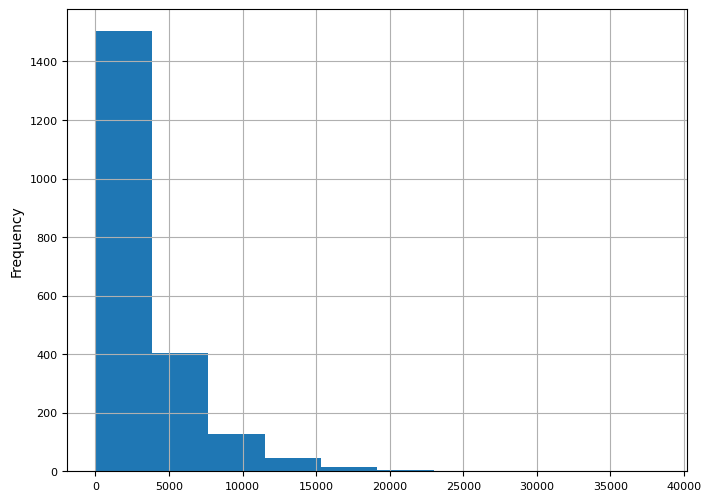

In [364]:
# transactions_df.groupby('household_key').agg({'SALES_VALUE': 'sum'}).plot.hist()

transactions_df.groupby('household_key').agg({'SALES_VALUE': 'sum'}).plot(kind='hist', 
                                                                          figsize= (8, 6), 
                                                                          legend=False, 
                                                                          fontsize= 8, 
                                                                          grid=True)

In [365]:
top10_by_sales = transactions_df.groupby('household_key').agg({'SALES_VALUE': 'sum'}).sort_values('SALES_VALUE', ascending=False)[:10]
top10_by_sales
top10__by_quantity = transactions_df.groupby('household_key').agg({'QUANTITY': 'sum'}).sort_values('QUANTITY', ascending=False)[:10]
top10__by_quantity

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [366]:
transactions_df.groupby('household_key').agg({'SALES_VALUE': 'sum', 'QUANTITY': 'sum'}).sort_values(['SALES_VALUE', 'QUANTITY'], ascending=[False, False])[:10]
transactions_df.groupby('household_key').agg({'QUANTITY': 'sum', 'SALES_VALUE': 'sum'}).sort_values(['QUANTITY', 'SALES_VALUE'], ascending=[False, False])[:10]

,QUANTITY,SALES_VALUE
household_key,,
1023,4479917,38319.79
755,3141769,10617.05
1609,2146715,27859.68
13,1863829,13190.92
1430,1741892,20352.99
1527,1734632,17295.18
1762,1669880,15360.14
707,1640193,19194.42
1029,1496204,13785.55


<Axes: title={'center': 'Top 10 Household sales'}, xlabel='household_key', ylabel='Total Sales'>

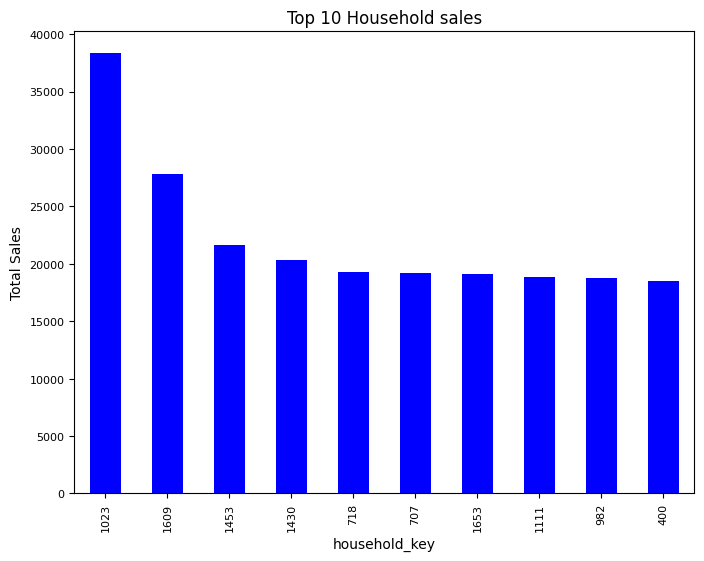

In [367]:
top10_by_sales.plot(kind='bar', 
                        legend=False, 
                        figsize= (8,6), 
                        fontsize=8, 
                        ylabel="Total Sales", 
                        title="Top 10 Household sales", 
                        color = "blue")

### Analyzing product sales 

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

<Figure size 640x480 with 0 Axes>

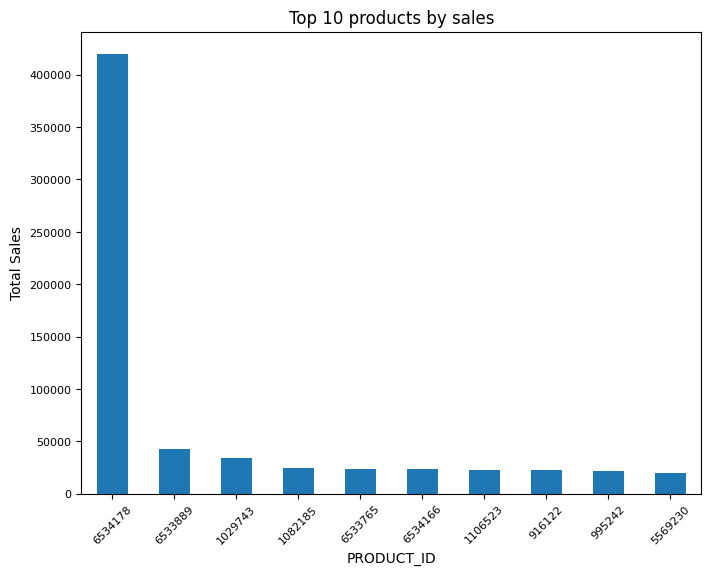

<Figure size 640x480 with 0 Axes>

In [368]:
'''Ploting products which had the most sales_values'''

transactions_df.groupby('PRODUCT_ID').agg({'SALES_VALUE': 'sum'}).sort_values('SALES_VALUE', ascending=False)[: 10].plot(kind='bar', 
                                                                                                                         figsize= (8,6), 
                                                                                                                         legend=False, 
                                                                                                                         fontsize= 8, 
                                                                                                                         ylabel= "Total Sales", 
                                                                                                                         title= "Top 10 products by sales")

plt.xticks(rotation=45)
plt.figure()

In [374]:
'''Checking if top 10 products has discount rate > average discount rate'''

top_10_products = transactions_df.groupby('PRODUCT_ID').agg({'SALES_VALUE': 'sum'}).sort_values('SALES_VALUE', ascending=False)[: 10]





# average_discount_rate = sum(total discount for 10 products)/ sum(total sales for 10 products)

average_discount_rate_top10 = (transactions_df.query("PRODUCT_ID in @top_10_products.index")
                         .agg({'total_discount':'sum'}).iloc[0]) / (
                        transactions_df.query("PRODUCT_ID in @top_10_products.index")
                         .agg({'SALES_VALUE':'sum'}).iloc[0])
print(average_discount_rate_top10)






main_columns = transactions_df.query("PRODUCT_ID in @top_10_products.index").groupby('PRODUCT_ID')[['SALES_VALUE', 'total_discount']].sum()
main_columns

main_columns.assign(
    discount_rate = main_columns['total_discount'].abs() / main_columns['SALES_VALUE'],
    diff_discountRate_AvgRate = lambda x:x['discount_rate'] - abs(average_discount_rate_top10),   # res>0 --> higher than average discount rate
    exceed_average_discount_rate = lambda y: np.where(y['diff_discountRate_AvgRate']> 0, "Yes", "No")
)

-0.10331266528732726


,SALES_VALUE,total_discount,discount_rate,diff_discountRate_AvgRate,exceed_average_discount_rate
PRODUCT_ID,,,,,
916122,22749.02,-23687.810547,1.041267,0.937955,Yes
995242,21229.72,-11363.709961,0.535274,0.431961,Yes
1029743,33894.75,-2175.060059,0.064171,-0.039142,No
1082185,24149.79,-1869.560059,0.077415,-0.025897,No
1106523,22931.01,-1427.760010,0.062263,-0.041049,No
5569230,20051.95,-10687.540039,0.532993,0.429680,Yes
6533765,23831.14,0.000000,0.000000,-0.103313,No
6533889,42339.31,-1445.680054,0.034145,-0.069168,No
6534166,23755.70,-787.440002,0.033147,-0.070165,No


# Conclusion
We can see that for our top ten products, our overall discount rate was around 10%, which is significantly lower than the 17% overall discount rate we saw for our general data set.

So another strong pricing strategy by our acquisition target here, they know that folks are coming to our store to buy these products.
* Why would we need to discount them if this is what they're coming to buy every week?
* What we need to discount are items that we're not sure the customer is going to buy without an extra incentive.

So by discounting our staple items less, that gives us more room to discount the items that might get folks to come in the door or sell products it might be starting to spoil or other things.

##########################################################################################################################################################

In [370]:
'''What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?'''
top_10_householdIDs = transactions_df.groupby(['household_key']).agg({'SALES_VALUE': 'sum'}).sort_values(['SALES_VALUE'], ascending=[False])[:10]
top_10_householdIDs


most_common_productIDs = transactions_df.query("household_key in @top_10_householdIDs.index").loc[:, 'PRODUCT_ID'].unique()
print(f'ProductIds are {most_common_productIDs}')
most_common_productIDs_count =transactions_df.query("household_key in @top_10_householdIDs.index").loc[:, 'PRODUCT_ID'].nunique()
print(f'count of productIds {most_common_productIDs_count}')



transactions_df.query("household_key in @top_10_householdIDs.index").loc[:, 'household_key'].unique()
transactions_df.query("household_key in @top_10_householdIDs.index").loc[:, 'household_key'].nunique()

ProductIds are [  830503   839605   840664 ...   925230  1093799 17937077]
count of productIds 13878


10

In [371]:
products = pd.read_csv(r'E:\Course Data Analysis with python (Maven Analytics)\Pandas+Course+Resources\Pandas Course Resources\project_data\product.csv', 
                       delimiter=',')

products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [372]:
'''Look up the names of the  top 10 products by sales in the `products.csv` dataset'''
top10_by_sales


lookup_top10_products = transactions_df.query("household_key in @top10_by_sales.index").loc[:, "PRODUCT_ID"].value_counts().sort_values(ascending=False)[:10]
lookup_top10_products


products.query("PRODUCT_ID in @lookup_top10_products.index")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [373]:
'''Look up the product name of the item that had the highest quantity sold in a single row.'''

top10__by_quantity


lookup2_top10_products = transactions_df.query("household_key in @top10__by_quantity.index").loc[:, "PRODUCT_ID"].value_counts().sort_values(ascending=False)[:10].index
lookup2_top10_products

products.query("PRODUCT_ID == @lookup2_top10_products[0]")


,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
